高级数据类型`tuple`,`list`,`dictionary`,`set`<br>
排序`sorted`<br>
常用第三方库libray:`numpy`,`matplotlib`,`PIL`,读取文件(`codecs`,`pickle`)<br>

`tuple`一但定义，不可修改

In [1]:
# 元组 tuple
a = (1, '2')
print a
print a[-1], type(a[-1])

# 遍历
for i in a:
    print i,

(1, '2')
2 <type 'str'>
1 2


`list`可修改

In [2]:
a=list(xrange(10))
b=[i for i in xrange(10)]
print a,b

# 添加
a.append('11')
print a

# 删除
a.pop() # 默认删除最后一位
print a
a.pop(0) # 删除第一位
print a

# 遍历
for i in b:
    print i,
print
    
# 切片访问
print b[2:-2]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, '11']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
0 1 2 3 4 5 6 7 8 9
[2, 3, 4, 5, 6, 7]


`dictionary`字典基于hash表实现

In [3]:
a=dict() # 空字典
print a

a['1']=1 # 添加元素
print a

b={str(i):i for i in xrange(10)}
print b

# 删除
del b['5']
print b

# 访问
print b['1']

# 遍历
for key, value in b.items():
    print key,'->',value,

{}
{'1': 1}
{'1': 1, '0': 0, '3': 3, '2': 2, '5': 5, '4': 4, '7': 7, '6': 6, '9': 9, '8': 8}
{'1': 1, '0': 0, '3': 3, '2': 2, '4': 4, '7': 7, '6': 6, '9': 9, '8': 8}
1
1 -> 1 0 -> 0 3 -> 3 2 -> 2 4 -> 4 7 -> 7 6 -> 6 9 -> 9 8 -> 8


字典速度

In [4]:
import time

# 建立时间对比
start = time.time()
b={str(i):i for i in xrange(10)}
print 'build time cost', time.time()-start


start = time.time()
for i in xrange(1000):
    for j in xrange(1000):
        b['2']
print 'visit time cost', time.time()-start

start = time.time()
b={hash(str(i)):i for i in xrange(10)}
print 'hash build time cost', time.time()-start


start = time.time()
for i in xrange(1000):
    for j in xrange(1000):
        b[hash('2')]
print 'hash visit time cost', time.time()-start

build time cost 0.000494003295898
visit time cost 0.0592591762543
hash build time cost 0.000196933746338
hash visit time cost 0.121084928513


`set`集合，自动求集合，并排好序

In [5]:
string = 'hello world'
print set(string)

set([' ', 'e', 'd', 'h', 'l', 'o', 'r', 'w'])


`sorted`排序

In [6]:
a = [3, 2, 4, 5, 1]
print sorted(a)

# 指定排序
age = [('Nevermore', 23), ('Furywind', 21), ('Facelss Void', 13)]
print sorted(age, key = lambda x:x[-1], reverse=True)

# 多条件排序
age_id = [('Nevermore', 23, '004'), ('Furywind', 21, '001'), ('Facelss Void', 23, '002'), ('Naga', 20, '003')]
print sorted(age_id, key = lambda x:(-x[1], x[-1]), reverse=True)

[1, 2, 3, 4, 5]
[('Nevermore', 23), ('Furywind', 21), ('Facelss Void', 13)]
[('Naga', 20, '003'), ('Furywind', 21, '001'), ('Nevermore', 23, '004'), ('Facelss Void', 23, '002')]


常用第三方库libray:`numpy`,`matplotlib`,`PIL`,`codecs`,`pickle`<br>
通过`sudo pip install **`安装

`numpy` - python科学计算基础矩阵库

In [7]:
import numpy as np

# 类似的有zeros, ones等
a = np.eye(2,3)
print a
print a.shape
print a[1, :]

print np.asarray(list(xrange(10)), dtype=np.float32)

[[ 1.  0.  0.]
 [ 0.  1.  0.]]
(2, 3)
[ 0.  1.  0.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


`matplotlib` - python绘图库

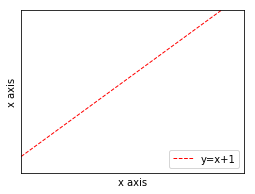

In [8]:
import matplotlib.pyplot as plt

x = np.linspace(1, 10, 50)
y = x + 1

# 设置图像大小
plt.figure(figsize=(4, 3))
plt.plot(x, y, color='red', linewidth=1.0, linestyle='--', label='y=x+1')
plt.legend(loc='lower right')
# 设置坐标轴范围
plt.xlim((1, 11))
plt.ylim((1, 11))
plt.xlabel('x axis')
plt.ylabel('x axis')
# 设置坐标轴数字
plt.xticks([])
plt.yticks([])
plt.show()
# 保存eps图像，无背景色
# plt.savefig('img.eps', transparent=True)

`PIL` - python图像库

In [9]:
from PIL import Image

# 从图像中导入
# Image.open('img.png')

# 从举证导入图像
img=np.ones(shape=(30,40))
Image.fromarray(img, 'I').convert('L')

`codecs` - 读/写文件

传统读取文件<br>
<br>
需要手动释放文件<br>
`txt_file = open('1.txt', mode='rb')
text = txt_file.read()
txt_file.close()`
<br>
无需手动释放文件<br>
`with open('1.txt', mode='rb') as txt_buffer:
    text = txt_buffer.read()`
<br>
一次读入内存空间<br>
`txt_buffer.read()`<br>
一次读所有行<br>
`txt_buffer.readlines()`<br>
一次读一行,这是最安全的读取方式<br>
`txt_buffer.readline()`<br>


这种`open`读取只能以`ASCII`的方式读取文件<br>
所以需要`codecs`读取

In [10]:
# ASCII
# read
with open('1.txt', mode='rb') as txt_buffer:
    for line in txt_buffer.readline():
        print line,

line = 'ni hao, python.\n'
# write
with open('1.txt', mode='wb') as txt_buffer:
    txt_buffer.write(line)

# add
with open('1.txt', mode='a') as txt_buffer:
    txt_buffer.write(line)

import codecs
# read
with codecs.open('1.txt', mode='rb', encoding='UTF-8') as txt_buffer:
    for line in txt_buffer.readline():
        print line,

line = 'ni hao, python.\n'
# write
with codecs.open('1.txt', mode='wb', encoding='UTF-8') as txt_buffer:
    txt_buffer.write(line)

n i   h a o ,   p y t h o n . 
n i   h a o ,   p y t h o n . 


`pickle` - 保存序列化文件

In [11]:
a=list(xrange(10))
print a

import pickle
with open('1.pkl', mode='wb') as pkl_buffer:
    pickle.dump(a, pkl_buffer)

del a

with open('1.pkl', mode='rb') as pkl_buffer:
    b = pickle.load(pkl_buffer)
    print b

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
